<a href="https://colab.research.google.com/github/NeoZ666/Medbay/blob/main/medbay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Project Presentation  
We are analysing the drug200 dataset from kaggle. We conducted a brief exploratory data analysis (EDA), performed feature selection, and attempted to classify drugs for appropriate patients. Throughout this project, we compared several methods including KNN, SVM, Logistic Regression, Decision Trees, and Dense Networks.

## This notebook contains:
- [1 Data Reading](#1-Data-reading)
- [2 EDA](#2-EDA)
- [3 Feature selection](#3-Future-selection)
- [4 Classification](#4-Classification)
    - [4.1 KNN](#4.1-KNN)
    - [4.2 logistic regression with feture selection using AIC](#4.2-logistic-regression)
    - [4.3 SVM](#4.3-SVM)
    - [4.4 Naive Bayes Classifier](#4.4-Naive-Bayes-Classifier)
    - [4.5 Decision Tree](#4.5-Decision-tree)
    - [4.5 Random Forest](#4.6-Random-forest)
    - [4.6 Neural Network](#4.7-Neural-network)
- [5 Summary](#5-Summary)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mutual_info_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning

import warnings
warnings.filterwarnings("ignore")
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

In my assignment I decided to built classification model to predict the outcome of the drugs that might be accurate for the patient.

# 1 Data reading


In [ ]:
Data = pd.read_csv('drug200.csv')
Data.replace('DrugY', 'drugY', inplace=True)
Data.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB



As shown above, the data set contains 200 observations and 6 columns. Apparently, there are no null values on the data set.


<center>


**Table 1: Drag data set**

| Feature          | Description                                           | Type                  |
|------------------|-------------------------------------------------------|-----------------------|
| Age              | Age of patient                                        | Numerical             |
| Sex              | Whether the customer is male (M) or female (F)        | Categorical           |
| BP               | Blood Pressure Levels                                 | Categorical           |
| Cholesterol      | Whether patient has high or normal choleserol level   | Categorical           |
| Na_to_K          | Na to Potassium Ration                                | Numerical             |
| Drug             | Drug type which should be prescripted for patient     | Categorical           |


</center>



<center>

**Table 2: Categorical feature Distribution in Dataset**

| Feature            | Categories              | Count |
|--------------------|-------------------------|------:|
| Sex                | M                       |  104  |
|                    | F                       |  96   |
| BP                 | LOW                     |  64   |
|                    | NORMAL                  |  59   |
|                    | HIGH                    |  77   |
| Cholesterol        | NORMAL                  |  97   |
|                    | HIGH                    |  103  |
| Drug               | DrugY                   |  91   |
|                    | DrugX                   |  54   |
|                    | DrugA                   |   23  |
|                    | DrugB                   |   16  |
|                    | DrugC                   |   16  |

</center>




We don't see significant disproportion in our dataset, apart from drug type - DrugA, DrugB and DrugC appears much less frequently than DrugX and drugY


In [ ]:
Data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
Data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


We didn't observed any nans and nulls in our dataset.


## Univariate Variable Analysis

### Age Variable

In [ ]:
print("Max Age:", Data.Age.max())
print("Min Age:", Data.Age.min())

Max Age: 74
Min Age: 15


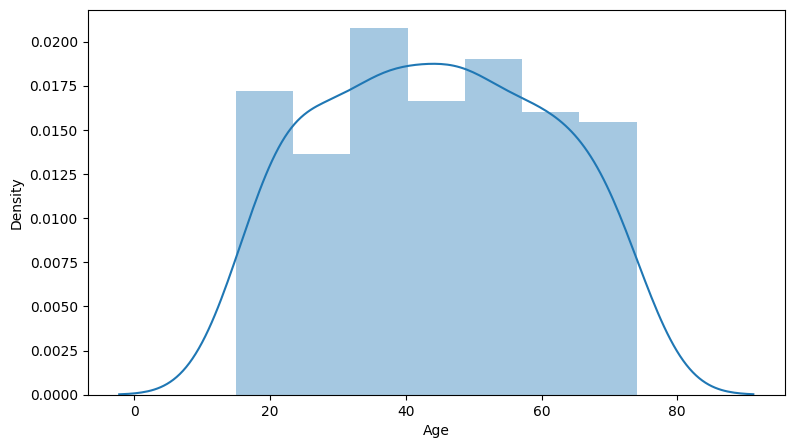

In [ ]:
# Age distribution
plt.figure(figsize = (9,5))
sns.distplot(Data.Age)
plt.show()

### Sex Variable

In [ ]:
Data.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

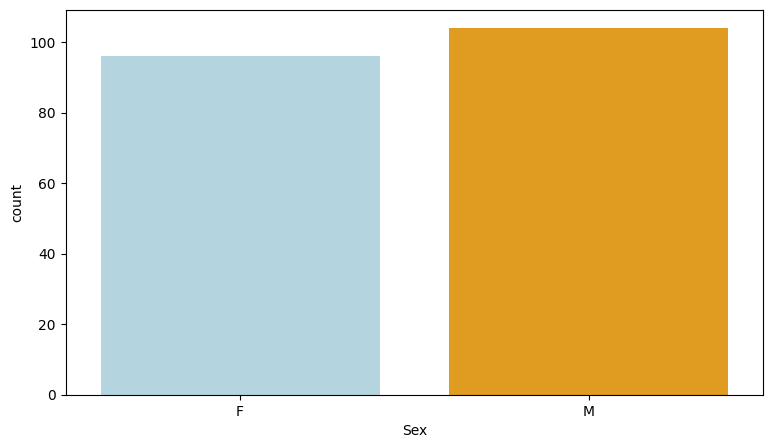

In [ ]:
# Sex Distribution
plt.figure(figsize=(9,5))
sns.countplot(x=Data['Sex'], palette=['lightblue', 'orange'])
plt.show()

### BP Variable

In [ ]:
Data.BP.value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

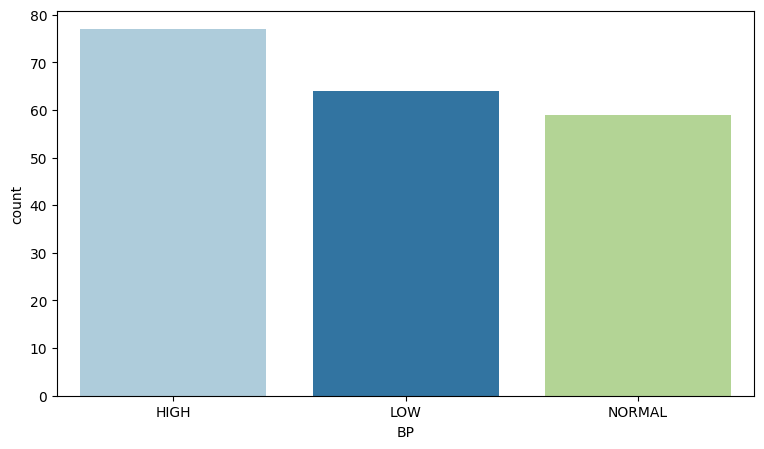

In [ ]:
custom_palette = sns.color_palette("Paired", len(Data['BP'].unique()))
plt.figure(figsize=(9, 5))
sns.countplot(x=Data['BP'], palette=custom_palette)
plt.show()


### Cholestrol Variable

In [ ]:
Data.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

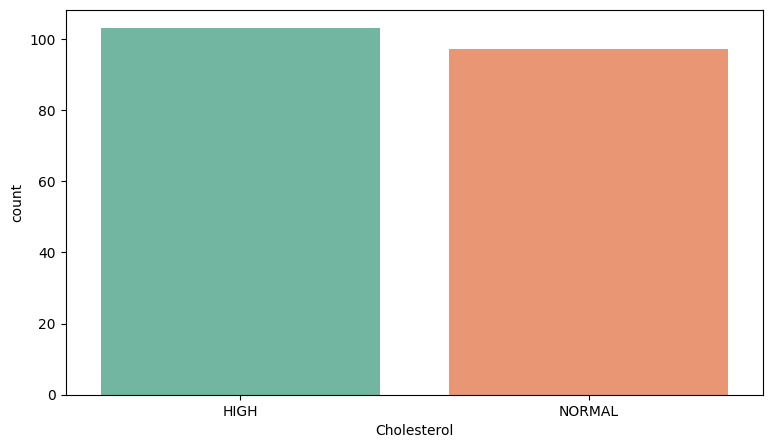

In [ ]:
custom_palette = sns.color_palette("Set2", len(Data['Cholesterol'].unique()))
plt.figure(figsize=(9, 5))
sns.countplot(x=Data['Cholesterol'], palette=custom_palette)
plt.show()


### Na_to_K Variable

In [ ]:
print("Max Na_to_K:",Data.Na_to_K.max())
print("Min Na_to_K:",Data.Na_to_K.min())
print("Mean Na_to_K:",Data.Na_to_K.mean())

Max Na_to_K: 38.247
Min Na_to_K: 6.269
Mean Na_to_K: 16.084485


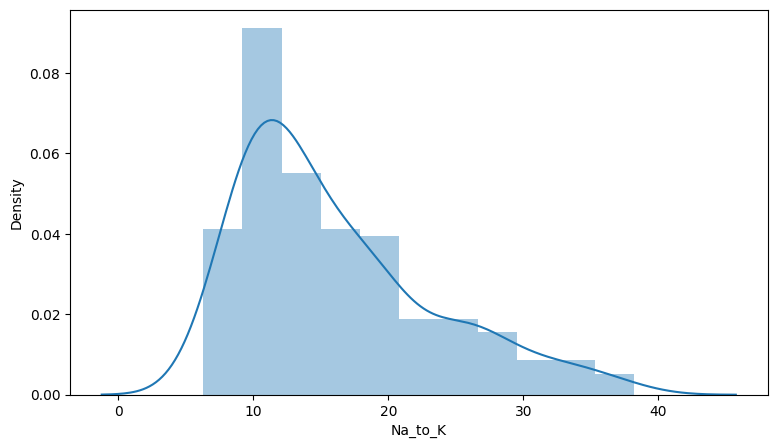

In [ ]:
plt.figure(figsize = (9,5))
sns.distplot(Data.Na_to_K)
plt.show()

### Drug Variable

In [ ]:
Data.Drug.value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

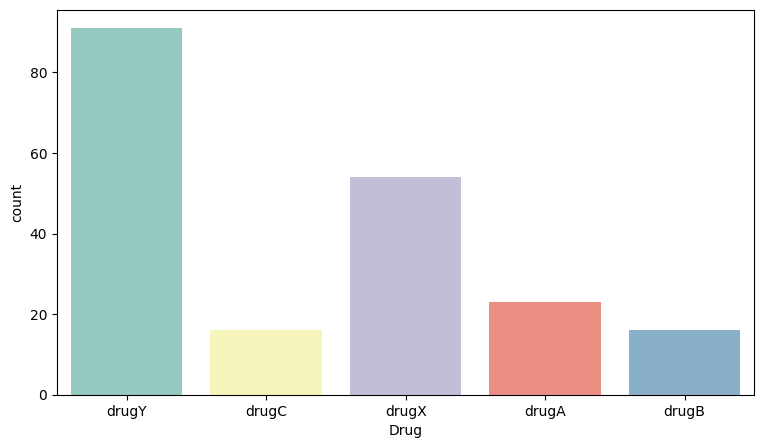

In [ ]:
custom_palette = sns.color_palette("Set3", len(Data['Drug'].unique()))
plt.figure(figsize=(9, 5))
sns.countplot(x=Data['Drug'], palette=custom_palette)
plt.show()

# 2 EDA


### Age -- Drug

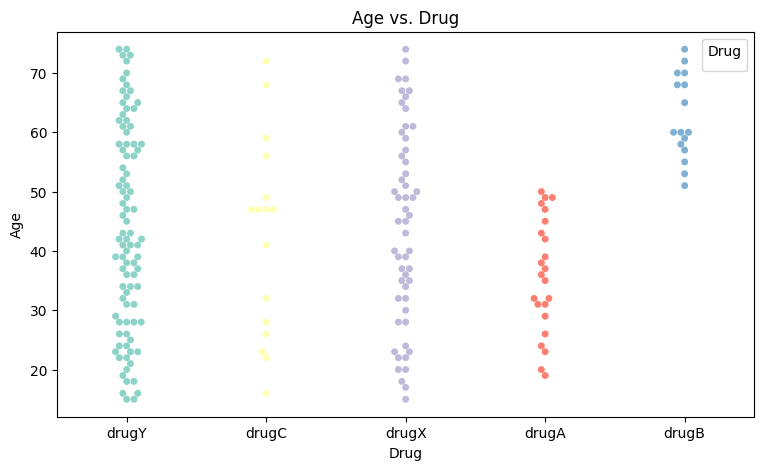

In [ ]:
plt.figure(figsize=(9, 5))
sns.swarmplot(x="Drug", y="Age", hue="Drug", data=Data, palette="Set3")
plt.legend(title='Drug')
plt.title("Age vs. Drug")
plt.show()

In [ ]:
print("Minimum Age of DrugB",Data.Age[Data.Drug == "drugB"].min())
print("Maximum Age of DrugA",Data.Age[Data.Drug == "drugA"].max())

Minimum Age of DrugB 51
Maximum Age of DrugA 50


### Sex -- Drug

In [ ]:
Data_Sex_Drug = Data.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
Data_Sex_Drug

Drug Sex  Count
0  drugA   F      9
1  drugA   M     14
2  drugB   F      6
3  drugB   M     10
4  drugC   F      7
5  drugC   M      9
6  drugX   F     27
7  drugX   M     27
8  drugY   F     47
9  drugY   M     44

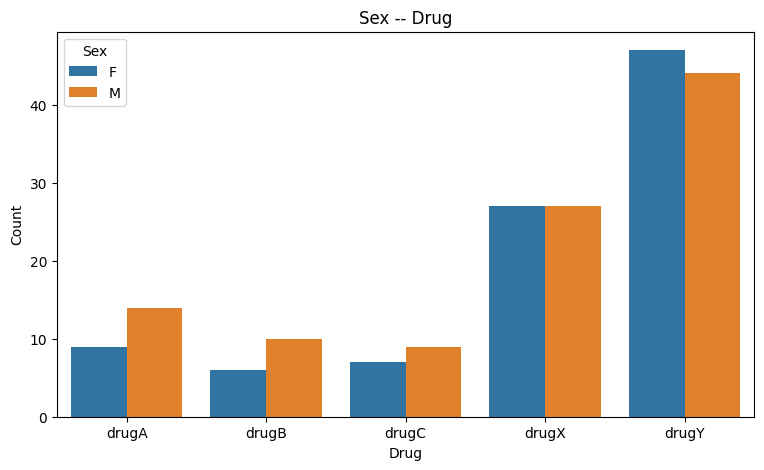

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = Data_Sex_Drug)
plt.title("Sex -- Drug")
plt.show()

### BP -- Drug

In [ ]:
Data_BP_Drug = Data.groupby(["Drug","BP"]).size().reset_index(name = "Count")
Data_BP_Drug

Drug      BP  Count
0  drugA    HIGH     23
1  drugB    HIGH     16
2  drugC     LOW     16
3  drugX     LOW     18
4  drugX  NORMAL     36
5  drugY    HIGH     38
6  drugY     LOW     30
7  drugY  NORMAL     23

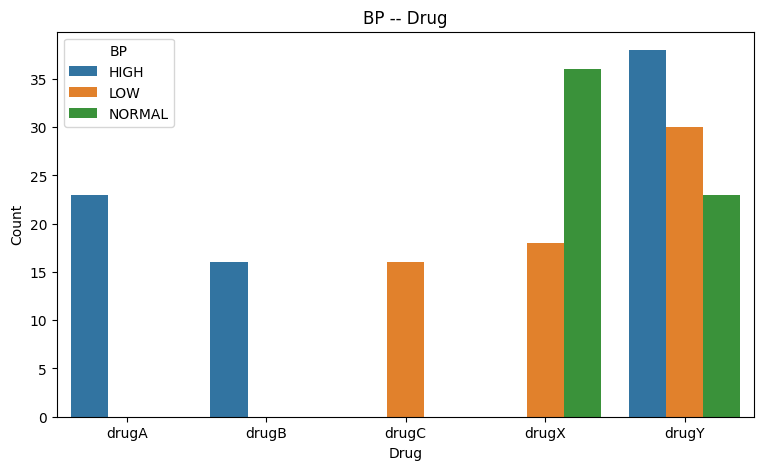

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = Data_BP_Drug)
plt.title("BP -- Drug")
plt.show()

### Na_to_K -- Drug

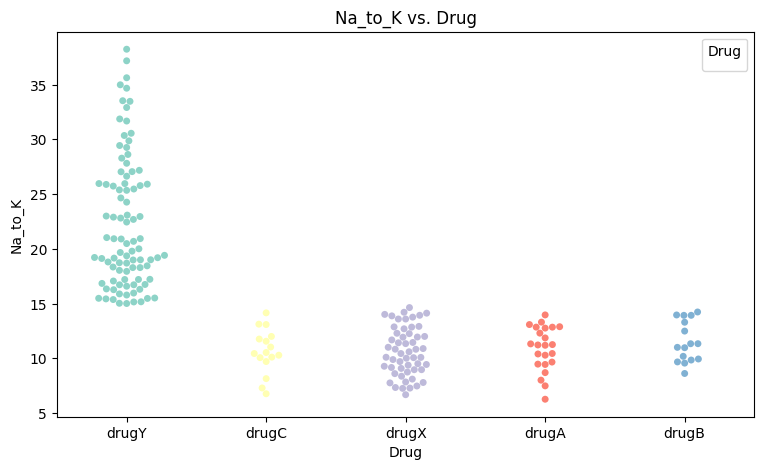

In [ ]:
plt.figure(figsize=(9, 5))
sns.swarmplot(x="Drug", y="Na_to_K", hue="Drug", data=Data, palette="Set3")
plt.legend(title='Drug')
plt.title("Na_to_K vs. Drug")
plt.show()


In [ ]:
print("Minimum Na_to_K for DrugY:",Data.Na_to_K[Data.Drug == "DrugY"].min())

Minimum Na_to_K for DrugY: nan


### Cholestrol -- Drug

In [ ]:
Data_CH_Drug = Data.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
Data_CH_Drug

Drug Cholesterol  Count
0  drugA        HIGH     12
1  drugA      NORMAL     11
2  drugB        HIGH      8
3  drugB      NORMAL      8
4  drugC        HIGH     16
5  drugX        HIGH     20
6  drugX      NORMAL     34
7  drugY        HIGH     47
8  drugY      NORMAL     44

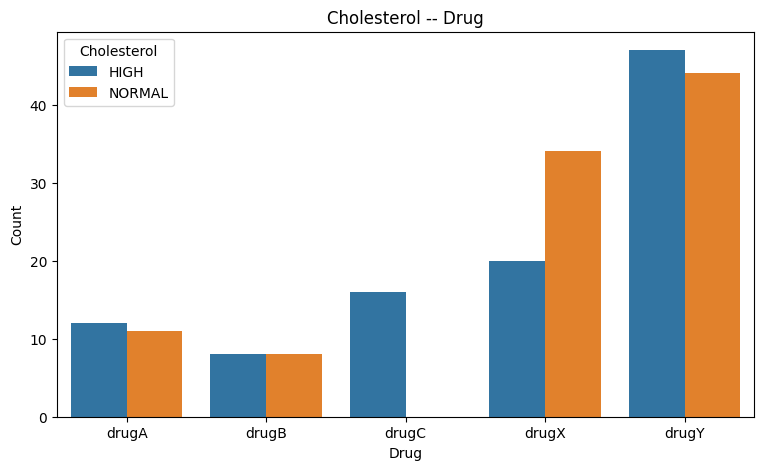

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = Data_CH_Drug)
plt.title("Cholesterol -- Drug")
plt.show()

### Na_to_K -- BP -- Drug

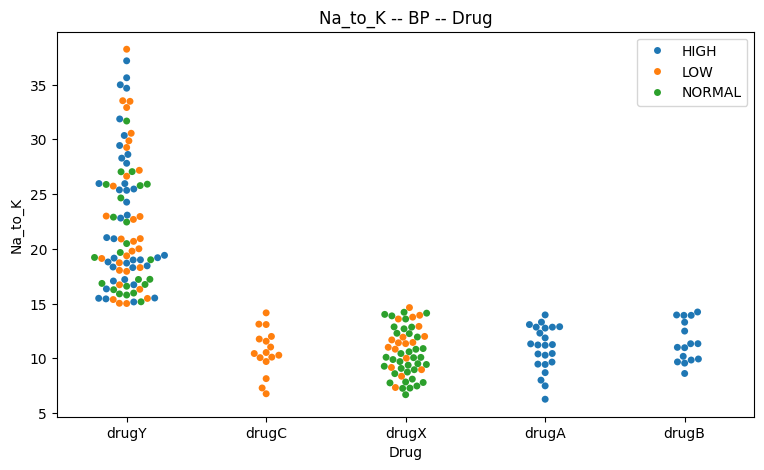

In [ ]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = Data)
plt.legend()
plt.title("Na_to_K -- BP -- Drug")
plt.show()


## 2.1 Categorical variables


<Axes: xlabel='Drug', ylabel='Count'>

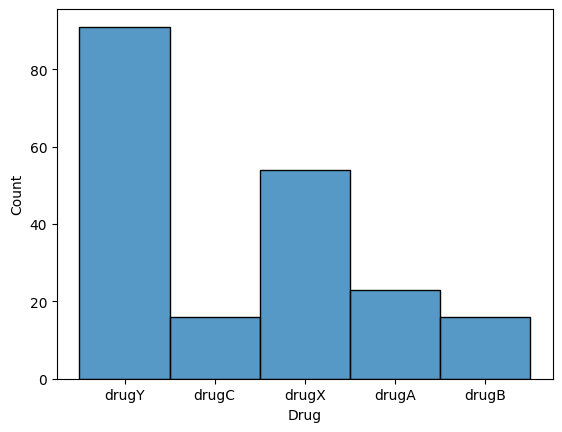

In [ ]:
sns.histplot(data=Data, x='Drug')

<Axes: xlabel='Drug', ylabel='Count'>

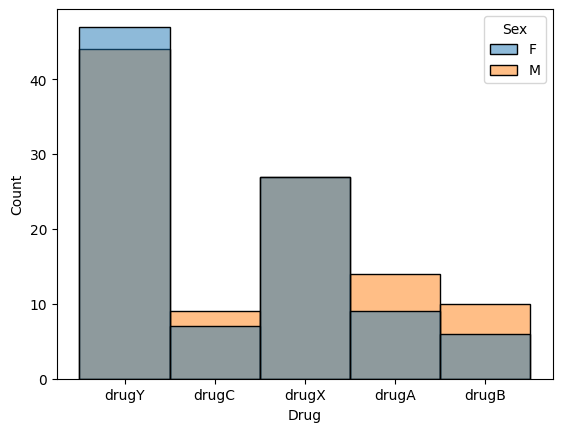

In [ ]:
sns.histplot(data=Data, x='Drug', hue='Sex')

<Axes: xlabel='Drug', ylabel='Count'>

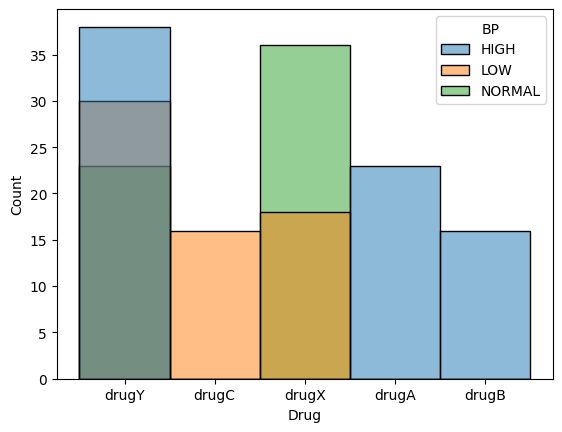

In [ ]:
sns.histplot(data=Data, x='Drug', hue='BP')


We can observe, that drugA and drugB is used only for patient with high BP and drugC is used only for patients with low BP.
drugX is used evenly for both patient with low and normal BP.


<Axes: xlabel='Drug', ylabel='Count'>

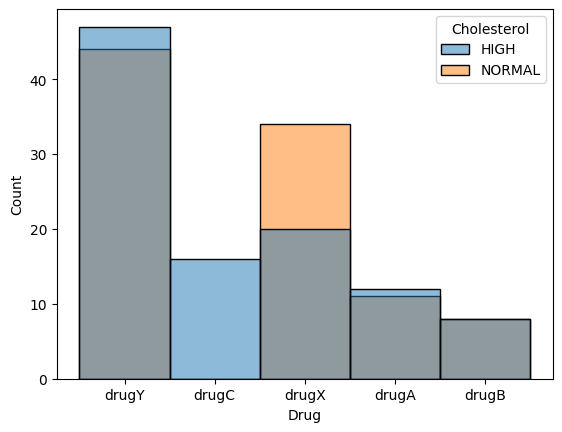

In [ ]:
sns.histplot(data=Data, x='Drug', hue='Cholesterol')


drugC was used only for patient with high cholesterol and drugX was used more often for patient with normal cholesterol.


## 2.2 Numerical variables

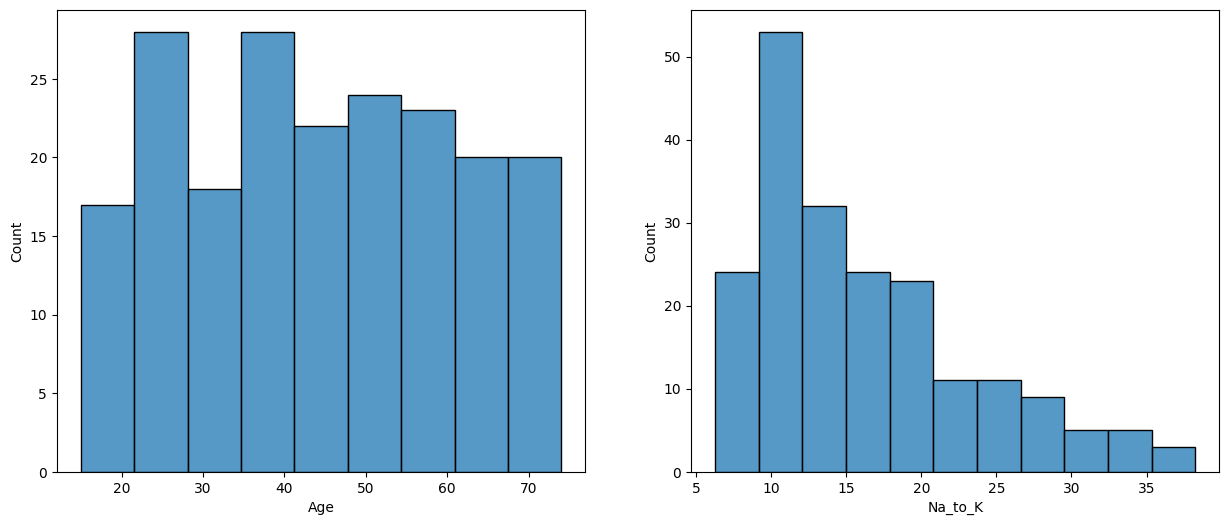

In [ ]:
plt.subplots(figsize=(15, 6))
plt.subplot(121)
sns.histplot(data=Data, x='Age')

plt.subplot(122)
sns.histplot(data=Data, x='Na_to_K')
plt.show()

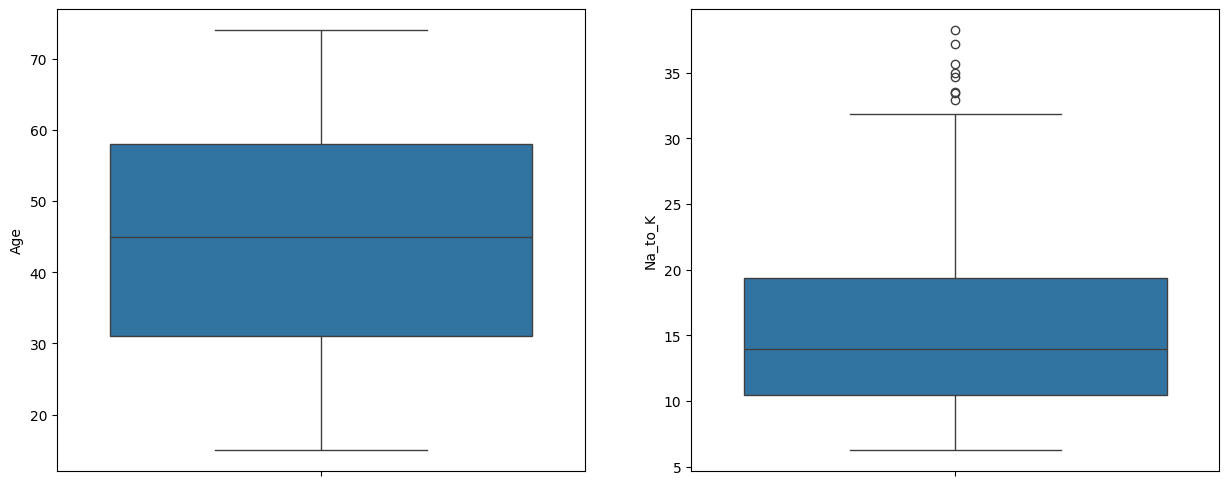

In [ ]:
plt.subplots(figsize=(15, 6))
plt.subplot(121)
sns.boxplot(data=Data, y='Age')

plt.subplot(122)
sns.boxplot(data=Data, y='Na_to_K')
plt.show()

<Axes: xlabel='Drug', ylabel='Age'>

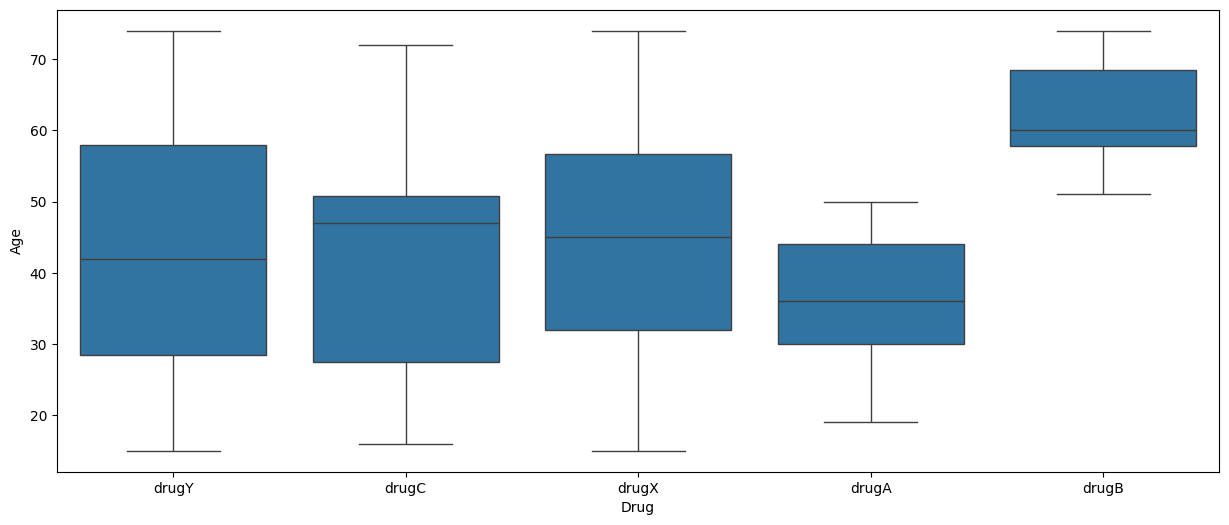

In [ ]:
plt.subplots(figsize=(15, 6))
sns.boxplot(data=Data, y='Age', x='Drug')

We can notice, that drugB is prescripted for group of patient with a higher mean Age than the others.


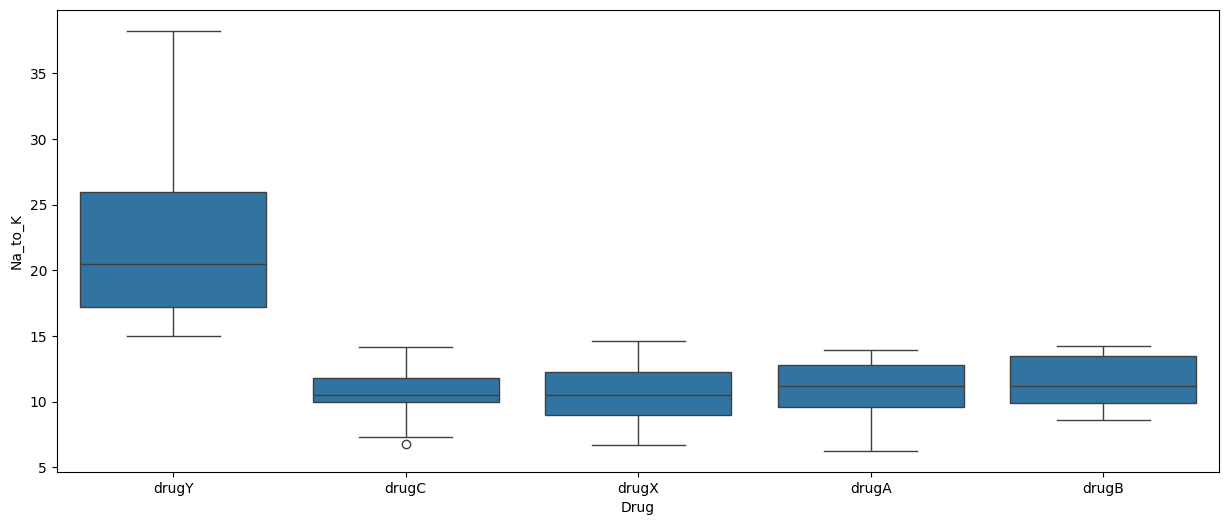

In [ ]:
plt.subplots(figsize=(15, 6))
sns.boxplot(data=Data, y='Na_to_K', x='Drug')
plt.show()

In this case, we can notice, that drugY is prescripted for group of patient with a higher Na_to_K.

After analysing numerical features, we found that this features do not contain observations which should be treated as outliers.

Now, we will check if features age and Na_to_K are highly correlated.


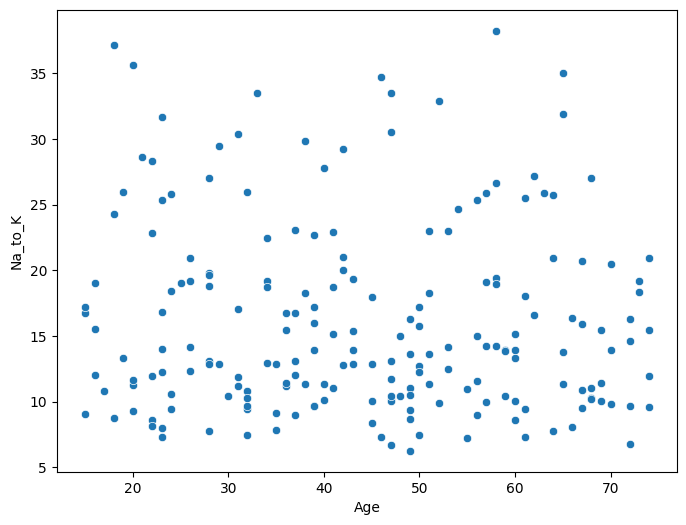

In [ ]:
plt.subplots(figsize=(8, 6))
sns.scatterplot(data=Data, x='Age', y='Na_to_K')
plt.show()

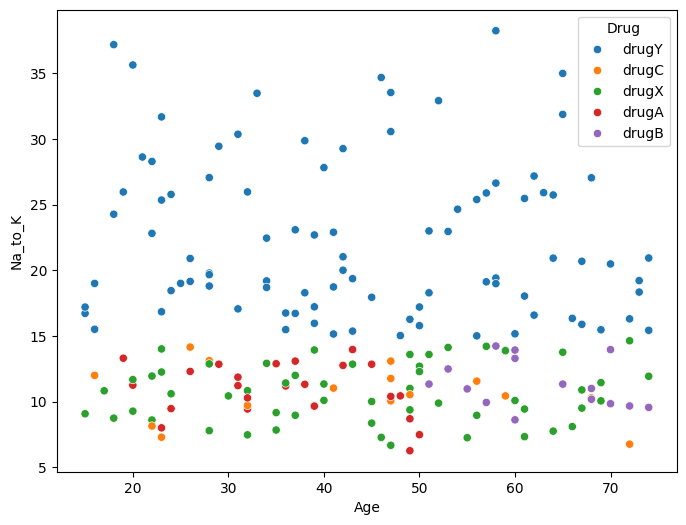

In [ ]:
plt.subplots(figsize=(8, 6))
sns.scatterplot(data=Data, x='Age', y='Na_to_K', hue='Drug')
plt.show()

In [ ]:
Data[['Age', 'Na_to_K']].corr()

Age   Na_to_K
Age      1.000000 -0.063119
Na_to_K -0.063119  1.000000

Based on above graph and correlation matrix we assume, that these features are not highly correlated.


# 3 Feature selection

In [ ]:
feature_columns = Data.drop(columns='Drug').columns.to_list()

# function that computes the mutual infomation score between a categorical serie and the column Drug
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, Data.Drug)

# select categorial variables excluding the response variable
categorical_variables = Data.select_dtypes(include=object).drop('Drug', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)


BP             0.429839
Cholesterol    0.064536
Sex            0.005340
dtype: float64


As shown above, Sex has a mutual information score close to 0, meaning those variables do not have a strong relationship with the target.


# 4 Classification


In [ ]:
colors = {0: 'b', 1: 'r', 2: 'g', 3: 'y', 4: 'k'}
markers = {0: '*', 1: '+', 2: 'x', 3: 'o', 4: '^'}


During classification scoring I will mark on the chart points with color - as they where predicted and with marker as they should. Legend of such marking can be found in the cell above.


In [ ]:
X = Data.drop(columns='Drug')
X_num = X.copy()
X_num.Sex = Data.Sex.map({'M': 0, 'F': 1})
X_num.Cholesterol = Data.Cholesterol.map({'NORMAL': 0, 'HIGH': 1})
X_num.BP = Data.BP.map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})


# X = pd.get_dummies(Data, columns=['Sex', 'Cholesterol', 'BP'])
X_categ = Data.drop(columns=['Drug', 'Age', 'Na_to_K'])
y = Data.Drug
y_num = y.copy().map({'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num, y_num, test_size=0.2, random_state=32)

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_num)
X_pca = pca.fit_transform(X_test_num)

## 4.1 KNN

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
knn_grid_parameters = {'n_neighbors': [i for i in range(20)],
                       'weights': ['uniform', 'distance']}

# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                                   param_distributions=knn_grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search
random_search.fit(X_num, y_num)

# print best parameter after tuning
print(random_search.best_params_)

{'weights': 'distance', 'n_neighbors': 14}


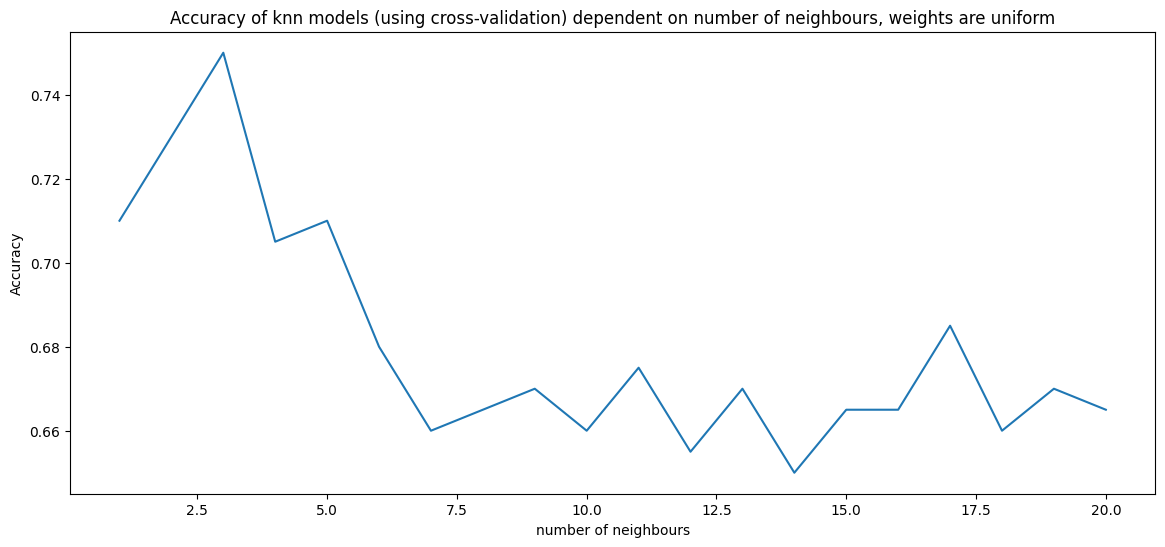

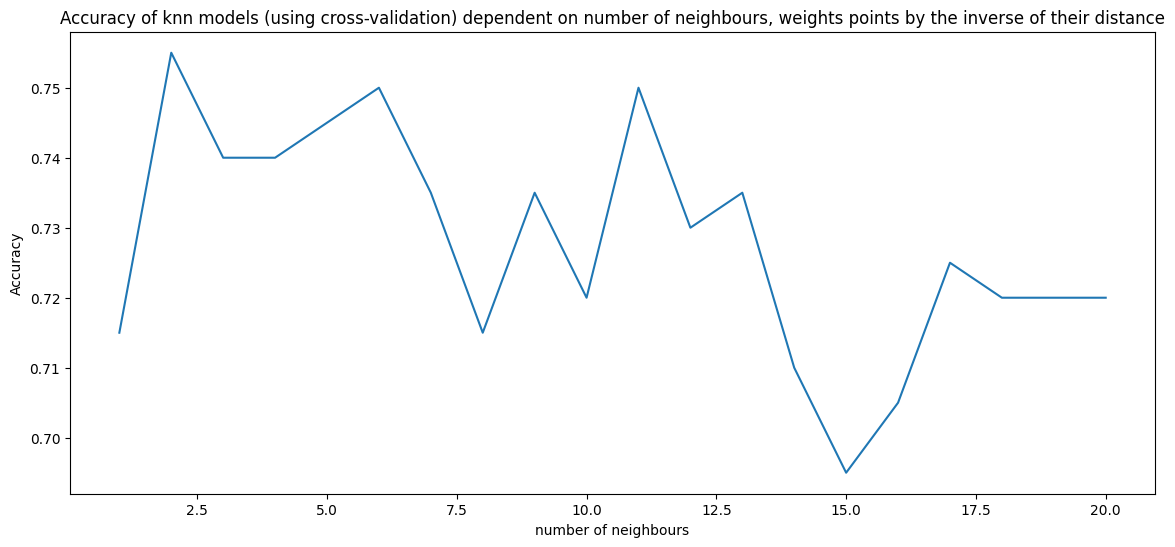

Best number of neighbours is: 2


In [ ]:
N = np.linspace(1, 20, 20, dtype=int)
N_score = np.zeros(len(N))
for n in N:
    knn = KNeighborsClassifier(n_neighbors=n+1, weights='uniform')
    N_score[n-1] = np.mean(cross_val_score(knn, X_num, y_num, cv=10))

plt.subplots(figsize=(14, 6))
plt.plot(N, N_score)
plt.xlabel('number of neighbours')
plt.ylabel('Accuracy')
plt.title('Accuracy of knn models (using cross-validation) dependent on number of neighbours, weights are uniform')
plt.show()

N = np.linspace(1, 20, 20, dtype=int)
N_score = np.zeros(len(N))
for n in N:
    knn = KNeighborsClassifier(n_neighbors=n+1, weights='distance')
    N_score[n-1] = np.mean(cross_val_score(knn, X_num, y_num, cv=10))

plt.subplots(figsize=(14, 6))
plt.plot(N, N_score)
plt.xlabel('number of neighbours')
plt.ylabel('Accuracy')
plt.title('Accuracy of knn models (using cross-validation) dependent on number of neighbours, weights points by the inverse of their distance')
plt.show()

print('Best number of neighbours is:', N[np.argmax(N_score)])

In [ ]:
Knn = KNeighborsClassifier(n_neighbors=14, weights='distance').fit(X_train_num, y_train_num)

knn_pred = Knn.predict(X_test_num)
print(classification_report(y_test_num, knn_pred))


              precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           1       0.00      0.00      0.00         2
           2       1.00      0.33      0.50         3
           3       0.31      0.44      0.36         9
           4       1.00      1.00      1.00        20

    accuracy                           0.65        40
   macro avg       0.51      0.39      0.41        40
weighted avg       0.68      0.65      0.65        40



<Axes: >

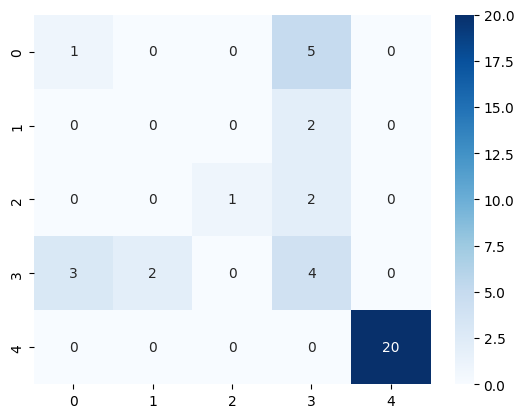

In [ ]:
sns.heatmap(confusion_matrix(y_test_num, knn_pred), annot=True, cmap='Blues', fmt='g')


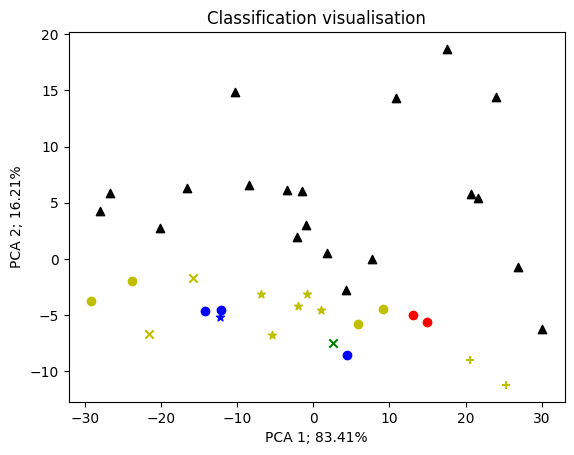

In [ ]:
for i in range(len(y_test_num)):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], c=colors[knn_pred[i]], marker=markers[list(y_test_num)[i]])

plt.title('Classification visualisation')
plt.xlabel(f'PCA 1; {(100*pca.explained_variance_ratio_[0]).round(2)}%')
plt.ylabel(f'PCA 2; {(100*pca.explained_variance_ratio_[1]).round(2)}%')
plt.show()


## 4.2 logistic regression


#### Feature selections using AIC


In [ ]:
from statsmodels.discrete.discrete_model import MNLogit

def AIC_steps_selection():
    all_features = list(X_num.columns)
    best_features = []
    best_AIC = np.inf
    best_x = None
    while True:
        better = False
        best_step_features = []
        for feature in all_features:
            if feature not in best_features:
                x = X_num[best_features + [feature]]
                model = MNLogit(y_num, x).fit()
                if model.aic < best_AIC:
                    best_step_features = best_features + [feature]
                    best_AIC = model.aic
                    better = True
        if better:
            best_features = best_step_features
        else:
            break
    return best_features

features_logit = AIC_steps_selection()

model = MNLogit(y, X_num[features_logit]).fit()
print(model.aic)

Optimization terminated successfully.
         Current function value: 1.403315
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.457337
         Iterations 6
         Current function value: 1.387461
         Iterations: 35
Optimization terminated successfully.
         Current function value: 1.509026
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.185249
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.012927
         Iterations 7
Optimization terminated successfully.
         Current function value: 1.156773
         Iterations 7
         Current function value: 0.710366
         Iterations: 35
Optimization terminated successfully.
         Current function value: 1.099431
         Iterations 8
Optimization terminated successfully.
         Current function value: nan
         Iterations 13
Optimization terminated successfully.
         Current f

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


              precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           1       0.00      0.00      0.00         2
           2       1.00      0.33      0.50         3
           3       0.31      0.44      0.36         9
           4       1.00      1.00      1.00        20

    accuracy                           0.65        40
   macro avg       0.51      0.39      0.41        40
weighted avg       0.68      0.65      0.65        40



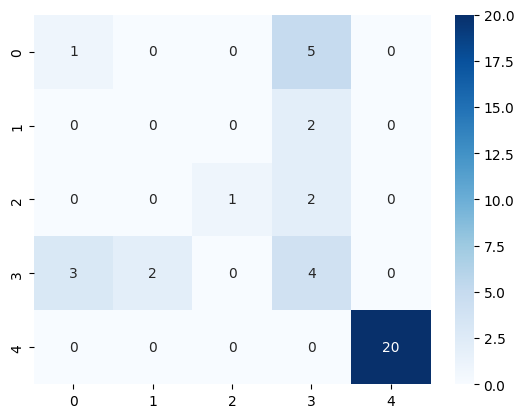

In [ ]:
MNLogReg = LogisticRegression(multi_class='multinomial').fit(X_train_num[features_logit], y_train_num)
MNLogReg_pred = Knn.predict(X_test_num)
print(classification_report(y_test_num, MNLogReg_pred))
sns.heatmap(confusion_matrix(y_test_num, MNLogReg_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

#### Feature selections using sklearn functions

In [ ]:
mnlog_grid_parameters = {'penalty':['l1', 'l2', 'elasticnet', None],
                        'class_weight':['balanced', None]}
# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=LogisticRegression(),
                                   param_distributions=mnlog_grid_parameters,
                                   cv=10,
                                   n_iter=300,
                                   n_jobs=-1)

# fitting the model for random search
random_search.fit(X_num, y_num)

# print best parameter after tuning
print(random_search.best_params_)

{'penalty': None, 'class_weight': None}


              precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           1       0.00      0.00      0.00         2
           2       1.00      0.33      0.50         3
           3       0.31      0.44      0.36         9
           4       1.00      1.00      1.00        20

    accuracy                           0.65        40
   macro avg       0.51      0.39      0.41        40
weighted avg       0.68      0.65      0.65        40



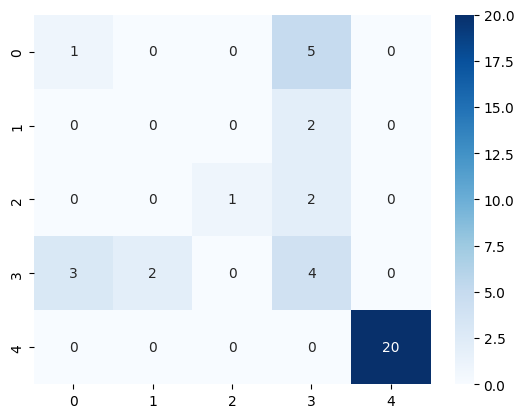

In [ ]:
MNLogReg = LogisticRegression(multi_class='multinomial', penalty=None).fit(X_train_num, y_train_num)
MNLogReg_pred = Knn.predict(X_test_num)
print(classification_report(y_test_num, MNLogReg_pred))
sns.heatmap(confusion_matrix(y_test_num, MNLogReg_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

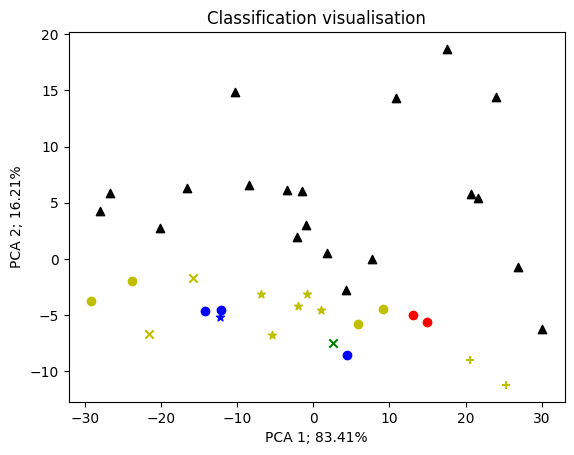

In [ ]:
for i in range(len(y_test_num)):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], c=colors[MNLogReg_pred[i]], marker=markers[list(y_test_num)[i]])

plt.title('Classification visualisation')
plt.xlabel(f'PCA 1; {(100*pca.explained_variance_ratio_[0]).round(2)}%')
plt.ylabel(f'PCA 2; {(100*pca.explained_variance_ratio_[1]).round(2)}%')
plt.show()

## 4.3 SVM

In [ ]:
svc_grid_parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                       'degree':[i for i in range(8)],
                      'gamma': ['scale', 'auto', float],
                      'class_weight': [None, 'balanced']}

# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=SVC(),
                                   param_distributions=svc_grid_parameters,
                                   cv=10,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search
random_search.fit(X_num, y_num)

# print best parameter after tuning
print(random_search.best_params_)

{'kernel': 'linear', 'gamma': 'auto', 'degree': 4, 'class_weight': None}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         3
           3       1.00      0.89      0.94         9
           4       0.95      0.95      0.95        20

    accuracy                           0.95        40
   macro avg       0.92      0.97      0.94        40
weighted avg       0.96      0.95      0.95        40



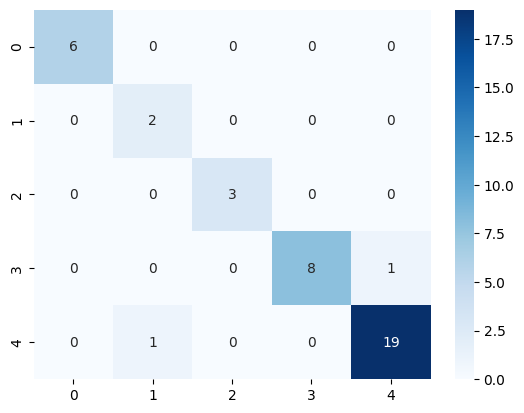

In [ ]:
SVC_model = SVC(kernel='linear', gamma='auto', degree=7, class_weight=None).fit(X_train_num, y_train_num)
SVC_model_pred = SVC_model.predict(X_test_num)
print(classification_report(y_test_num, SVC_model_pred))
sns.heatmap(confusion_matrix(y_test_num, SVC_model_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

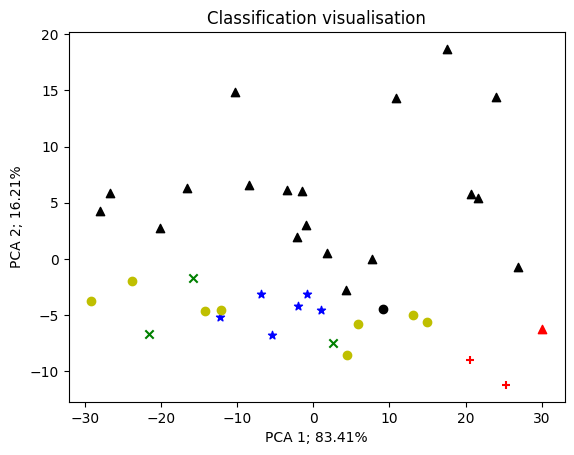

In [ ]:
for i in range(len(y_test_num)):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], c=colors[SVC_model_pred[i]], marker=markers[list(y_test_num)[i]])

plt.title('Classification visualisation')
plt.xlabel(f'PCA 1; {(100*pca.explained_variance_ratio_[0]).round(2)}%')
plt.ylabel(f'PCA 2; {(100*pca.explained_variance_ratio_[1]).round(2)}%')
plt.show()

## 4.4 Naive Bayes Classifier

In [ ]:
NB_grid_parameters = {'alpha': [*np.linspace(0, 3, 31)],
                       'fit_prior':[True, False]}

# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=ComplementNB(),   # for imbalanced dataset
                                   param_distributions=NB_grid_parameters,
                                   cv=10,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search
random_search.fit(X_num, y_num)

# print best parameter after tuning
print(random_search.best_params_)

{'fit_prior': True, 'alpha': 2.4000000000000004}


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.36      0.56      0.43         9
           4       0.65      0.85      0.74        20

    accuracy                           0.55        40
   macro avg       0.20      0.28      0.23        40
weighted avg       0.41      0.55      0.47        40



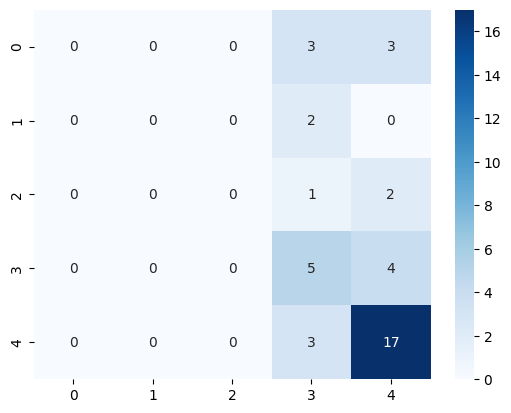

In [ ]:
NB_model = ComplementNB(alpha=2.4, fit_prior=True).fit(X_train_num, y_train_num)
NB_model_pred = NB_model.predict(X_test_num)
print(classification_report(y_test_num, NB_model_pred))
sns.heatmap(confusion_matrix(y_test_num, NB_model_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

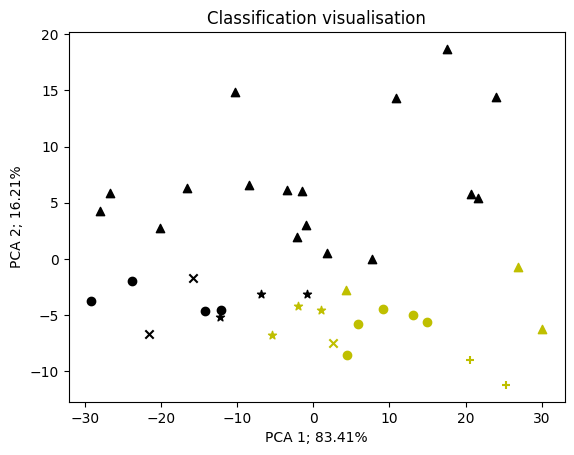

In [ ]:
for i in range(len(y_test_num)):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], c=colors[NB_model_pred[i]], marker=markers[list(y_test_num)[i]])

plt.title('Classification visualisation')
plt.xlabel(f'PCA 1; {(100*pca.explained_variance_ratio_[0]).round(2)}%')
plt.ylabel(f'PCA 2; {(100*pca.explained_variance_ratio_[1]).round(2)}%')
plt.show()

## 4.5 Decision tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
tree_grid_parameters = {'criterion': ['gini', 'entropy', 'log-loss'],
                      'max_depth': [i for i in range(50)],
                      'min_samples_split': [i for i in range(4)],
                      'min_samples_leaf': [i for i in range(10)],
                      'max_features': ['auto', 'sqrt', 'log2'],
                      'max_leaf_nodes': [i for i in range(50)],
                      'class_weight': ['balanced', None]}

# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                                   param_distributions=tree_grid_parameters,
                                   cv=10,
                                   n_iter=1500,
                                   n_jobs=-1)

# fitting the model for random search
random_search.fit(X_num, y_num)

# # print best parameter after tuning
print(random_search.best_params_)

{'min_samples_split': 3, 'min_samples_leaf': 1, 'max_leaf_nodes': 32, 'max_features': 'auto', 'max_depth': 35, 'criterion': 'gini', 'class_weight': None}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.67      1.00      0.80         2
           2       1.00      0.67      0.80         3
           3       0.64      0.78      0.70         9
           4       0.83      0.75      0.79        20

    accuracy                           0.80        40
   macro avg       0.83      0.84      0.82        40
weighted avg       0.82      0.80      0.80        40



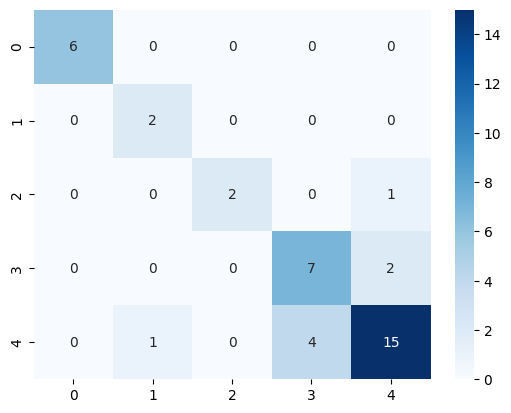

In [ ]:
DecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=11, min_samples_split=3,
                                      min_samples_leaf=3, max_features='log2', max_leaf_nodes=30,
                                      class_weight=None)
DecisionTreeModel = DecisionTree.fit(X_train_num, y_train_num)

DecisionTree_pred = DecisionTreeModel.predict(X_test_num)
print(classification_report(y_test_num, DecisionTree_pred))
sns.heatmap(confusion_matrix(y_test_num, DecisionTree_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

In [ ]:
import numpy as np

input = [20, 0, 1, 1, 20]
input_array = np.array(input).reshape(1, -1)
prediction = DecisionTreeModel.predict(input_array)
prediction

array([3])

In [ ]:
plt.figure(figsize=(150,100))
tree.plot_tree(DecisionTree, feature_names=list(X_num.columns), class_names=y, filled=True, fontsize=45)
plt.show()

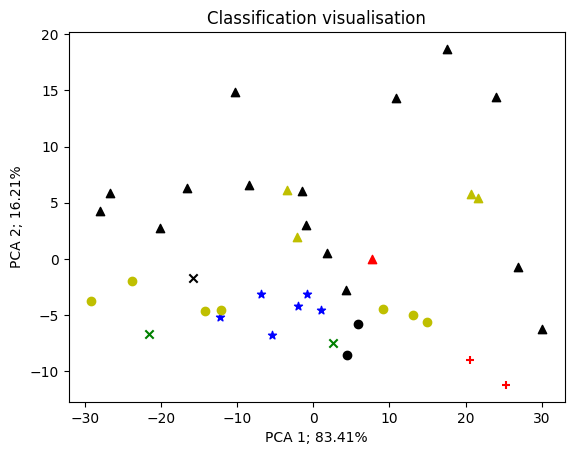

In [ ]:
for i in range(len(y_test_num)):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], c=colors[DecisionTree_pred[i]], marker=markers[list(y_test_num)[i]])

plt.title('Classification visualisation')
plt.xlabel(f'PCA 1; {(100*pca.explained_variance_ratio_[0]).round(2)}%')
plt.ylabel(f'PCA 2; {(100*pca.explained_variance_ratio_[1]).round(2)}%')
plt.show()

## 4.6 Random forest

In [ ]:
forest_grid_parameters = {'n_estimators': [10*(i+1) for i in range(100)],
                        'criterion': ['gini', 'entropy', 'log-loss'],
                      'max_depth': [i for i in range(50)],
                      'min_samples_split': [i for i in range(4)],
                      'min_samples_leaf': [i for i in range(10)],
                      'max_features': [None, 'sqrt', 'log2'],
                      'max_leaf_nodes': [i for i in range(50)],
                      'class_weight': ['balanced', 'balanced_subsample', None]}

# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=forest_grid_parameters,
                                   cv=10,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search
random_search.fit(X_num, y_num)

# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 480, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_leaf_nodes': 49, 'max_features': None, 'max_depth': 29, 'criterion': 'entropy', 'class_weight': None}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



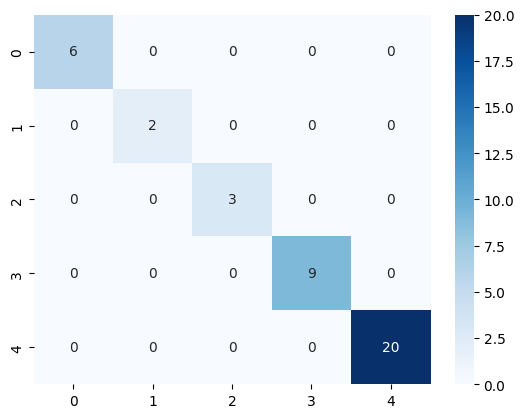

In [ ]:
RandomForest = RandomForestClassifier(n_estimators=760, criterion='gini', max_depth=6, min_samples_split=2,
                                      min_samples_leaf=9, max_features=None, max_leaf_nodes=33,
                                      class_weight=None)
RandomForestModel = RandomForest.fit(X_train_num, y_train_num)

RandomForest_pred = RandomForestModel.predict(X_test_num)
print(classification_report(y_test_num, RandomForest_pred))
sns.heatmap(confusion_matrix(y_test_num, RandomForest_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

In [ ]:
import pickle
filename = 'RF_trained_model.sav'
pickle.dump(RandomForestModel, open(filename, 'wb'))

filename = 'RF_trained_model.pkl'
pickle.dump(RandomForestModel, open(filename, 'wb'))

In [ ]:
import pickle

# Save the model
with open('DT_trained_model.pkl', 'wb') as file:
    pickle.dump(DecisionTreeModel, file)

In [ ]:
filename = 'DT_trained_model.sav'
pickle.dump(DecisionTreeModel, open(filename, 'wb'))

filename = 'DT_trained_model.pkl'
pickle.dump(DecisionTreeModel, open(filename, 'wb'))

In [ ]:
import joblib

# Save the model using joblib
joblib.dump(DecisionTreeModel, 'DT_trained_model(2).joblib')

['DT_trained_model(2).joblib']

In [ ]:
!pip install dill
import dill

# Save the model using dill
with open('DT_trained_model(2).dill', 'wb') as file:
    dill.dump(DecisionTreeModel, file)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
import cloudpickle

# Save the model using cloudpickle
with open('DT_trained_model(2).cloudpickle', 'wb') as file:
    cloudpickle.dump(DecisionTreeModel, file)

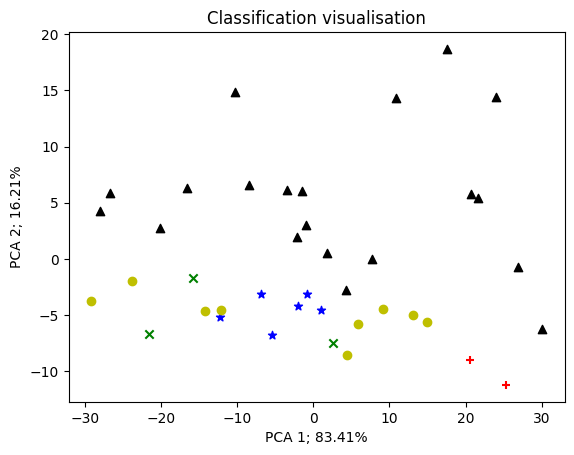

In [ ]:
for i in range(len(y_test_num)):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], c=colors[RandomForest_pred[i]], marker=markers[list(y_test_num)[i]])

plt.title('Classification visualisation')
plt.xlabel(f'PCA 1; {(100*pca.explained_variance_ratio_[0]).round(2)}%')
plt.ylabel(f'PCA 2; {(100*pca.explained_variance_ratio_[1]).round(2)}%')
plt.show()

## 4.7 Neural network

In [ ]:
# Multi-layer Perceptron classifier.
# This model optimizes the log-loss function using LBFGS or stochastic gradient descent.
network_parameters = {'hidden_layer_sizes': [i for i in range(2, 100)],
                      'activation': ['identity', 'logistic', 'tanh', 'relu'],
                      'shuffle': [True, False]}

random_search = RandomizedSearchCV(estimator=MLPClassifier(),
                                   param_distributions=network_parameters,
                                   cv=10,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search
random_search.fit(X_num, y_num)

# print best parameter after tuning
print(random_search.best_params_)

{'shuffle': False, 'hidden_layer_sizes': 93, 'activation': 'tanh'}


              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         3
           3       0.67      0.67      0.67         9
           4       0.90      0.95      0.93        20

    accuracy                           0.82        40
   macro avg       0.62      0.72      0.66        40
weighted avg       0.76      0.82      0.79        40



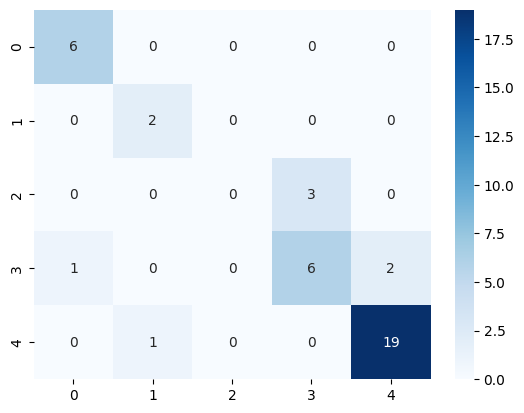

In [ ]:
Network = MLPClassifier(hidden_layer_sizes=99, activation='tanh', shuffle=False)
NetworkModel = Network.fit(X_train_num, y_train_num)

NetworkModel_pred = NetworkModel.predict(X_test_num)
print(classification_report(y_test_num, NetworkModel_pred))
sns.heatmap(confusion_matrix(y_test_num, NetworkModel_pred), annot=True, cmap='Blues', fmt='g')
plt.show()

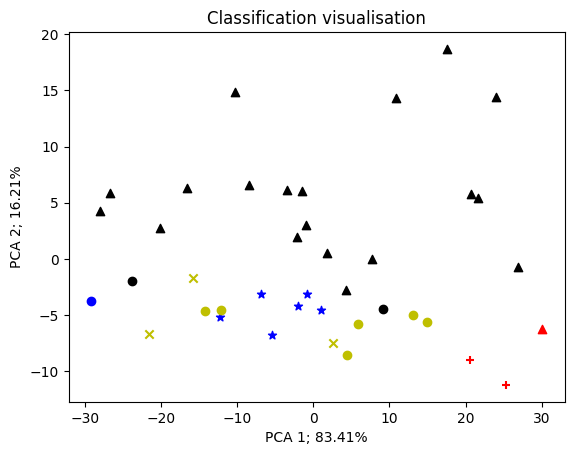

In [ ]:
for i in range(len(y_test_num)):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], c=colors[NetworkModel_pred[i]], marker=markers[list(y_test_num)[i]])

plt.title('Classification visualisation')
plt.xlabel(f'PCA 1; {(100*pca.explained_variance_ratio_[0]).round(2)}%')
plt.ylabel(f'PCA 2; {(100*pca.explained_variance_ratio_[1]).round(2)}%')
plt.show()

# 5 Summary

Hence, we here conclude our project, let's move on to using Random Forest classifier as an example implementation in Streamlit Community Cloud